In [5]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 838.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

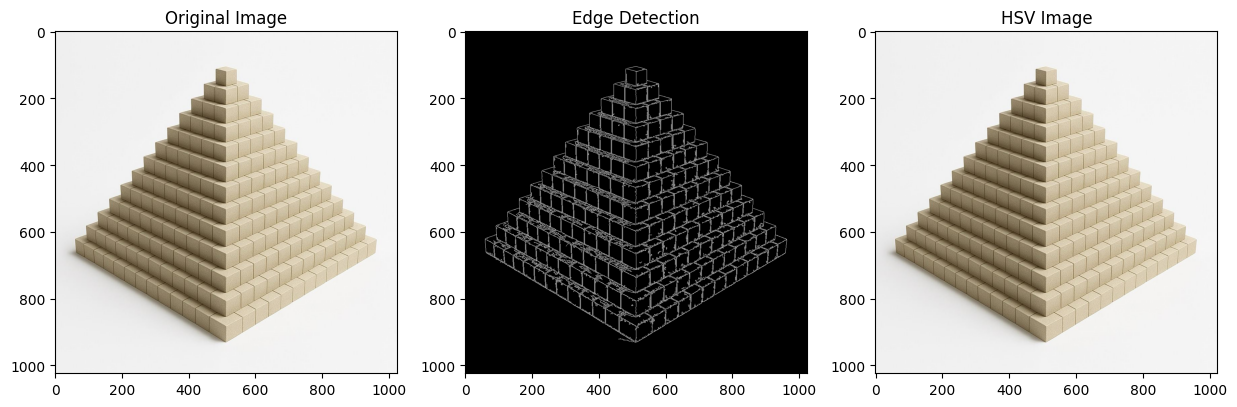

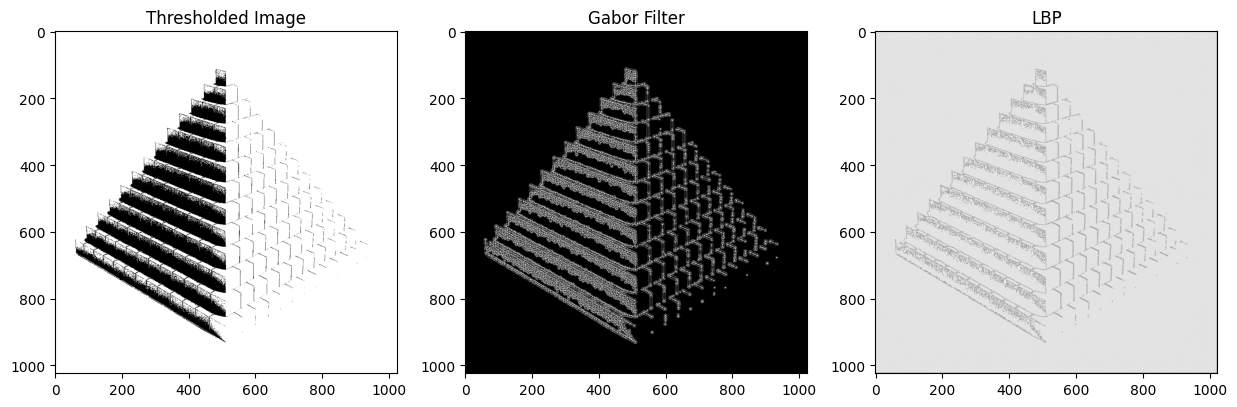

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('tri.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# T1.1 Edge-based segmentation (Canny Edge Detection)
edges = cv2.Canny(gray, 50, 150)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

plt.subplot(133)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.title('HSV Image')

plt.show()

# T1.2 Region-based segmentation using Thresholding

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gabor, threshold_otsu
from skimage.feature import local_binary_pattern
from skimage.io import imread

ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#Gabor filter
gabor_kernels = []
for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]:  # Different orientations
    kernel, _ = gabor(binary, frequency=0.2, theta=theta)
    gabor_kernels.append(kernel)

#LBP
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(binary, n_points, radius, method='uniform')

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Thresholded Image')

axes[1].imshow(np.mean(gabor_kernels, axis=0), cmap='gray')
axes[1].set_title('Gabor Filter')

axes[2].imshow(lbp, cmap='gray')
axes[2].set_title('LBP')

plt.show()



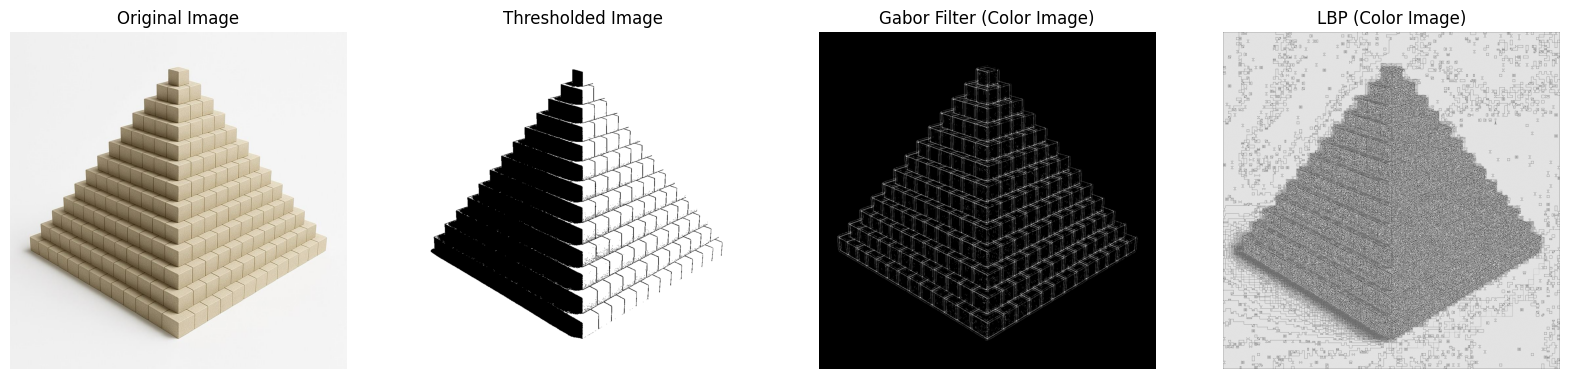

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import gabor, threshold_otsu
from skimage.feature import local_binary_pattern
from skimage.io import imread


image = imread('tri.jpg')

# Convert to grayscale for thresholding
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Otsu thresholding
thresh_value = threshold_otsu(gray)
binary = (gray > thresh_value).astype(np.uint8) * 255  # Convert to binary image

# Apply Gabor filter to each color channel
gabor_kernels = []
for i in range(3):  # Iterate over R, G, B channels
    channel = image[:, :, i]
    gabor_responses = []
    for theta in [0, np.pi/4, np.pi/2, 3*np.pi/4]:  # Different orientations
        kernel, _ = gabor(channel, frequency=0.2, theta=theta)
        gabor_responses.append(kernel)
    gabor_kernels.append(np.mean(gabor_responses, axis=0))

# Merge Gabor responses from all channels
gabor_combined = np.mean(gabor_kernels, axis=0)

# Apply LBP to each channel and merge results
radius = 1
n_points = 8 * radius
lbp_channels = [local_binary_pattern(image[:, :, i], n_points, radius, method='uniform') for i in range(3)]
lbp_combined = np.mean(lbp_channels, axis=0)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

axes[2].imshow(gabor_combined, cmap='gray')
axes[2].set_title('Gabor Filter (Color Image)')
axes[2].axis('off')

axes[3].imshow(lbp_combined, cmap='gray')
axes[3].set_title('LBP (Color Image)')
axes[3].axis('off')

plt.show()


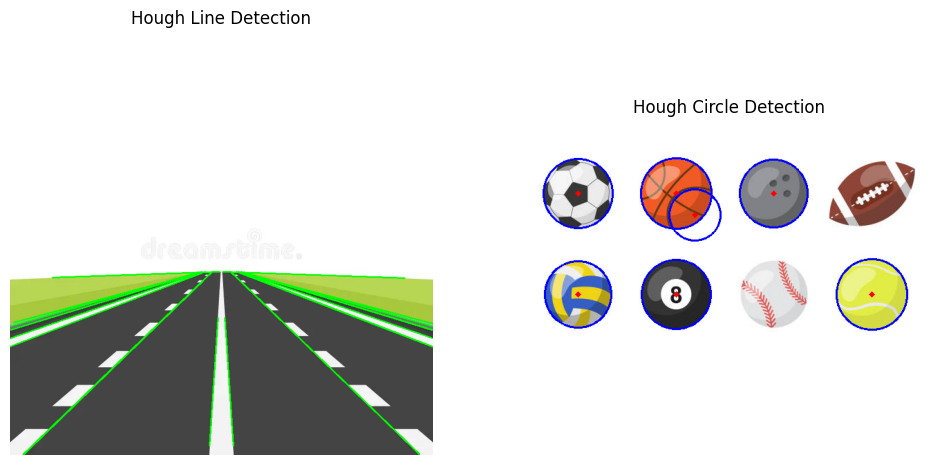

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# edge-detected image for line detection
image = cv2.imread('road.webp')
edges = cv2.Canny(image, 50, 150)

# Hough Transform for Line Detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=125, minLineLength=15, maxLineGap=100)#Minimum number of intersections in the Hough space
line_image = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# image for circle detection
eye_image = cv2.imread('balls.jpg')
gray = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (9, 9), 2)


circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
    param1=100, param2=40, minRadius=30, maxRadius=60
)

circle_image = eye_image.copy()


if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(circle_image, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)  # Outer circle
        cv2.circle(circle_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)  #center


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Circle Detection')
plt.axis('off')

plt.show()

In [ ]:
!pip install tensorflow

In [ ]:

pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu


In [ ]:

pip install --upgrade ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 93.7MB/s]



0: 448x640 1 person, 1 bicycle, 8 cars, 1 traffic light, 39.6ms
Speed: 12.1ms preprocess, 39.6ms inference, 383.7ms postprocess per image at shape (1, 3, 448, 640)


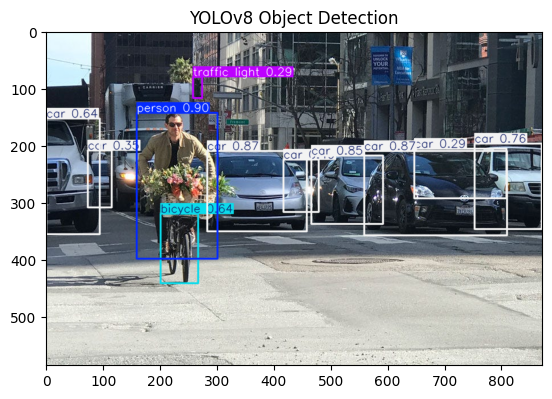

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 165MB/s]


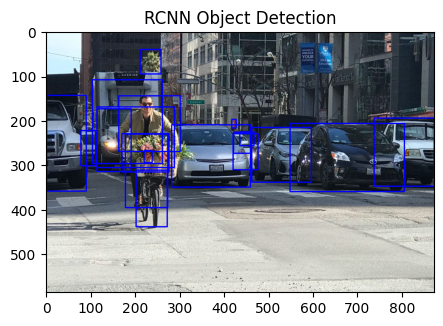

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import torchvision
import torchvision.transforms as transforms

# Load YOLO model
yolo = YOLO('yolov8n.pt')

# Load image
image = cv2.imread('sample.jpg')
results = yolo(image)

# Annotated YOLOv8 results
annotated_image = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('YOLOv8 Object Detection')
plt.show()

transform = transforms.Compose([transforms.ToTensor()])

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

image_tensor = transform(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).unsqueeze(0)

with torch.no_grad():
    predictions = model(image_tensor)

rcnn_image = np.copy(image)

# Process predictions
for i, box in enumerate(predictions[0]['boxes']):
    score = predictions[0]['scores'][i].item()
    if score > 0.5:
        x1, y1, x2, y2 = map(int, box.numpy())
        cv2.rectangle(rcnn_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(rcnn_image, cv2.COLOR_BGR2RGB))
plt.title('RCNN Object Detection')
plt.show()
